In [300]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [301]:
to_meV = 27211.6
to_nano = 0.05292
dx = 0.5 / to_nano
l = 100
bariera = 10
V_b = 30 / to_meV
m_0 = 1
m = 0.067 * m_0

In [302]:
def norm(arr):
    I = np.sum((np.abs(arr)**2)*dx)
    return arr / np.sqrt(I)

In [303]:
def ψx(arr, E, V):
    arr = np.array(arr, dtype=np.csingle)
    for i in range(len(arr)-2)[::-1]:
        arr[i] = - 2 * m * (E-V[i+1]) * dx**2 * arr[i+1] - arr[i+2] + 2 * arr[i+1]
    return arr

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'X [nm]')

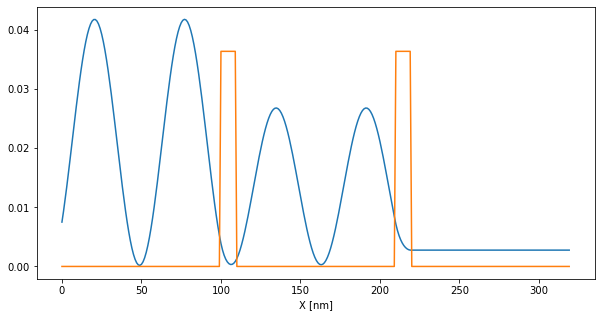

In [304]:
ψ = np.zeros(3*l + 2*bariera, dtype=np.csingle)
E = 7 / to_meV
q = np.sqrt(2*m*E)
V = np.zeros(len(ψ), dtype=np.csingle)

V[100:110] = V_b
V[210:220] = V_b

ψ[-1] = 1
ψ[-2] = np.exp(-complex(0,1) * q * dx)

ψ = ψx(ψ, E, V)

plt.figure(figsize=(10,5))
plt.plot(norm(np.abs(ψ)**2))
plt.plot(norm(V)/2)
plt.xlabel('X [nm]')

In [305]:
x = np.arange(0,3*l+2*bariera)*dx

def get_A(arr):
    A = (arr[0]*np.exp(1j*q*x[0])- arr[1]*np.exp(1j*q*x[1])) / (np.exp(1j*q*x[0])**2 - np.exp(1j*q*x[1])**2)
    return A

def get_B(arr):
    B = - ((-arr[1]*np.exp(1j*q*x[0]) + arr[0]*np.exp(1j*q*x[1]))*np.exp((x[1] + x[0])*1j*q)) / (np.exp(1j*q*x[0])**2 - np.exp(1j*q*x[1])**2)
    return B

def get_T(arr,E):
    q = np.sqrt(2*m*E)
    return 1/np.abs(get_A(arr))**2

def get_R(arr,E):
    q = np.sqrt(2*m*E)
    return (np.abs(get_B(arr))**2) / (np.abs(get_A(arr))**2)

In [306]:
R = (np.abs(get_B(ψ))**2) / (np.abs(get_A(ψ))**2)
T = 1/np.abs(get_A(ψ))**2
(R, T)

(0.7675176654022926, 0.23248812708576877)

Text(0.5, 0, 'X [nm]')

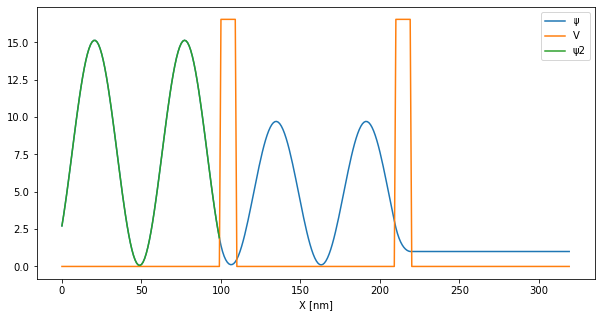

In [307]:
A = get_A(ψ)
B = get_B(ψ)

X = np.arange(100)*dx
ψ2 = np.zeros(100)
ψ2 = A * np.exp(1j*q*X) + B * np.exp(-1j*q*X)

plt.figure(figsize=(10,5))
plt.plot((np.abs(ψ)**2), label='ψ')
plt.plot(V*15000, label='V')
plt.plot(np.abs(ψ2)**2, label='ψ2')
plt.legend()
plt.xlabel('X [nm]')

In [308]:
temp_ψ = np.zeros(3*l + 2*bariera, dtype=np.csingle)
temp_ψ[-1] = 1
temp_ψ[-2] = np.exp(-complex(0,1) * q * dx)

En = np.linspace(0.001,50,1000)/to_meV
arr_T = np.zeros(len(En))
arr_R = np.zeros(len(En))

for i in range(len(En)):
    q = np.sqrt(2*m*En[i])
    temp_ψ = np.zeros(3*l + 2*bariera, dtype=np.csingle)
    temp_ψ[-1] = 1
    temp_ψ[-2] = np.exp(-complex(0,1) * q * dx)
    
    temp_ψ = ψx(temp_ψ, En[i], V)
    arr_T[i] = get_T(temp_ψ, En[i])
    arr_R[i] = get_R(temp_ψ, En[i])
    

Text(0.5, 0, 'E [MeV]')

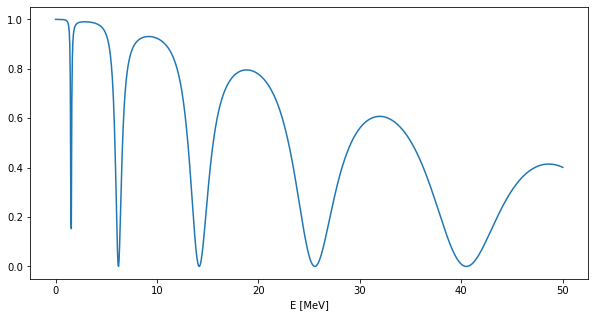

In [309]:
plt.figure(figsize=(10,5))
plt.plot(En*to_meV,arr_R)
plt.xlabel('E [MeV]')

Text(0.5, 0, 'E [MeV]')

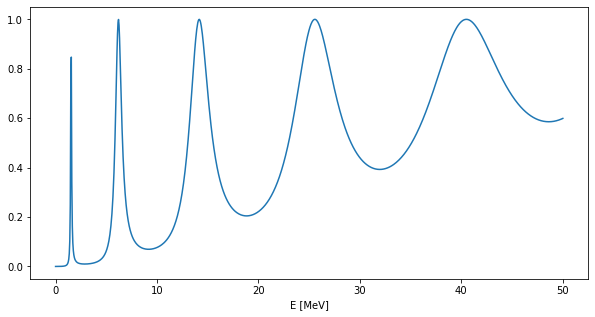

In [310]:
plt.figure(figsize=(10,5))
plt.plot(En*to_meV,arr_T)
plt.xlabel('E [MeV]')

0.8471483938811988
0.9994613058314809
0.9999619032323528
0.999965586960827


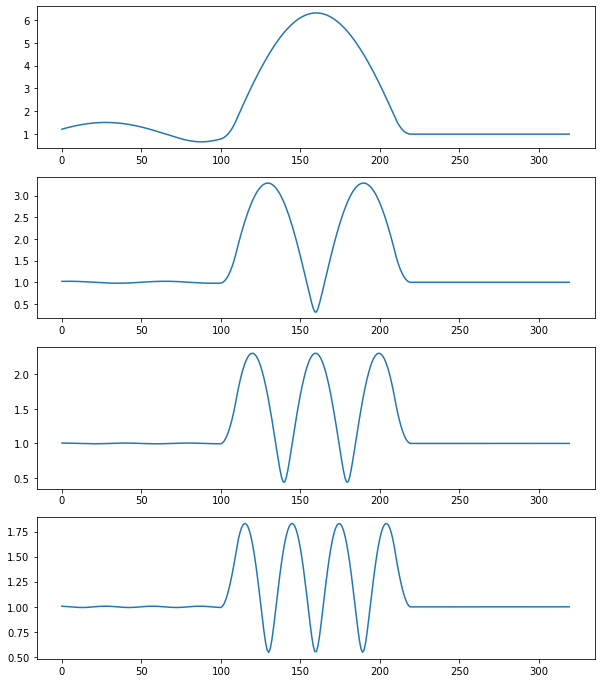

In [311]:
arr_E = []
for i in range(1,len(arr_T)-1):
    if arr_T[i-1] < arr_T[i] > arr_T[i+1]:
        arr_E.append(En[i])
        # print(i)
# arr_E[3] = arr_E[4]

plt.figure(figsize=(10,12))
for i in  range(1,5):
    q = np.sqrt(2*m*arr_E[i-1])
    ψ = np.zeros(3*l + 2*bariera, dtype=np.csingle)
    ψ[-1] = 1
    ψ[-2] = np.exp(-complex(0,1) * q * dx)

    plt.subplot(4,1,i)
    ψ = ψx(ψ, arr_E[i-1], V)
    plt.plot(np.abs(ψ))
    print(get_T(ψ,arr_E[i]))
    # plt.plot(norm(V)/2)
